# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Regression Challenge
Week 3 | Day 5

## The Times university ranking dataset analysis

In this challenge, you will draw on the skills you have learned over the past three weeks to create a model of university prestige using the provided predictors. Specifically, your goal is to **predict the total score for each university for the year 2016**. This score directly maps into the university ranking.

You will be drawing on the following skills:
- Basic python and pandas skills
- Data cleaning
- EDA
- Regression
- Regularization
- Cross validation

## The Dataset

The data is in a csv file in your repo. It contains the following columns:

- **world_rank** - world rank for the university. Contains rank ranges and equal ranks (e.g. = 94 and 201-250).
- **university_name** - name of university.
- **country** - country of each university.
- **teaching** - university score for teaching (the learning environment).
- **international** - university score international outlook (staff, students, research).
- **research** - university score for research (volume, income and reputation).
- **citations** - university score for citations (research influence).
- **income** - university score for industry income (knowledge transfer).
- **total_score** - total score for university, used to determine rank.
- **num_students** - number of students at the university.
- **student_staff_ratio** - Number of students divided by number of staff.
- **international_students** - Percentage of students who are international.
- **female_male_ratio** - Female student to Male student ratio.
- **year** - year of the ranking (2011 to 2016 included).

The target is the **total score**, which directly corresponds to the final ranking.

**N.B. - if the total score is reported as "-" that will be considered a 0 when scoring.**

## Guidelines

- You will be provided with the data and targets from 2011 through 2015 and the data (no targets) for 2016.<br><br>

- Before 12:00pm, all final answers should be submitted by filling in the  predicted values for each university in the submission sheet. (.to_csv() should be useful for this). <br><br>

- Your submission will be assessed on MSE -- so consider your loss functions! <br><br>

## Guidelines

The analysis is up to you. **This is fully open-ended.** You are expected to:

- Load the packages you need to do analysis
- Perform EDA on variables of interest
- Form a hypothesis or hypotheses on what is important for the score
- Check your data for problems, clean and munge data into correct formats
- Create or combine new columns/features where beneficial
- Perform statistical analysis with regression and describe the results

---

I will be here in class to help, but if you do not know how to do something, I expect you to **check documentation first**.

**You are not expected to know how to do things by heart. Knowing how to effectively look up the answers on the internet is a critical skill for data scientists!**

## Teams

Finally, you will be working as part of a team on this. To the randomizer...

In [18]:
import pandas as pd
import numpy as np
import sklearn as sk

In [194]:
df1=pd.read_csv("datasets/challenge-dataset.csv")
df2=pd.read_csv("datasets/ranking-submission.csv")

In [12]:
df1.head(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,"2,243",6.9,27%,33 : 67,2011


In [21]:
df1.columns

Index([u'world_rank', u'university_name', u'country', u'teaching',
       u'international', u'research', u'citations', u'income', u'total_score',
       u'num_students', u'student_staff_ratio', u'international_students',
       u'female_male_ratio', u'year'],
      dtype='object')

In [23]:
df1.groupby("university_name")['total_score'].mean()

DataError: No numeric types to aggregate

In [27]:
temp=df1[pd.notnull(df1['total_score'])]

In [28]:
#Income 
y=df1['total_score']
x=df1[[u'teaching',
       u'international', u'research', u'citations', u'income', u'total_score',
       u'num_students', u'student_staff_ratio', u'international_students',
       u'female_male_ratio']]


In [42]:
#df1[df1['income']=='-']['university_name'].unique()

In [40]:
df1.columns

Index([u'world_rank', u'university_name', u'country', u'teaching',
       u'international', u'research', u'citations', u'income', u'total_score',
       u'num_students', u'student_staff_ratio', u'international_students',
       u'female_male_ratio', u'year'],
      dtype='object')

In [46]:
[x for x in df1['num_students']]

['20,152',
 '2,243',
 '11,074',
 '15,596',
 '7,929',
 '18,812',
 '19,919',
 '36,186',
 '15,060',
 '11,751',
 '38,206',
 '14,221',
 '15,128',
 '21,424',
 '18,178',
 '41,786',
 '66,198',
 '25,055',
 '20,376',
 '11,885',
 '19,835',
 '26,607',
 '44,020',
 '15,172',
 '18,334',
 '26,199',
 '19,967',
 '3,055',
 '22,020',
 '50,152',
 '26,518',
 '27,233',
 '42,727',
 '31,592',
 '31,326',
 '40,128',
 '40,148',
 '12,528',
 '2,429',
 '25,774',
 '11,385',
 '2,400',
 '14,604',
 '7,774',
 '25,581',
 nan,
 '6,333',
 '9,666',
 '26,614',
 '14,290',
 '12,161',
 '46,825',
 '10,410',
 '35,364',
 '8,653',
 '56,959',
 '22,809',
 '39,763',
 '24,789',
 '42,056',
 '12,338',
 '35,691',
 '11,829',
 '26,485',
 '9,259',
 '51,462',
 '29,325',
 '17,906',
 '17,404',
 '6,753',
 '41,868',
 '23,845',
 '20,771',
 '36,534',
 '7,867',
 '15,521',
 '21,394',
 '21,908',
 '9,027',
 '12,001',
 '34,718',
 nan,
 '28,881',
 '25,674',
 '15,489',
 nan,
 '34,938',
 '8,747',
 '28,251',
 '20,925',
 '26,583',
 '7,326',
 '23,823',
 '22,19

In [65]:
df1[pd.isnull(df1[''])]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
45,43,University of Wisconsin,United States of America,55.5,43.7,64.6,83.4,-,67,NaN,NaN,NaN,NaN,2011
81,81,University of York,United Kingdom,47.9,66.6,46.2,81.9,36.2,59.1,NaN,NaN,NaN,NaN,2011
85,86,London School of Economics and Political Science,United Kingdom,62.4,99.5,56.2,51.6,38.4,58.3,NaN,NaN,NaN,NaN,2011
111,112,Bilkent University,Turkey,34.3,47.7,36.1,95.7,32.4,55.4,NaN,NaN,NaN,NaN,2011
115,115,University of Hawai�i at M_noa,United States of America,38.3,34.2,47.6,81.0,-,55.2,NaN,NaN,NaN,NaN,2011
157,158,Georgia Health Sciences University,United States of America,67.3,16.3,41.7,48.9,50.1,50.7,NaN,NaN,NaN,NaN,2011
246,47,London School of Economics and Political Science,United Kingdom,66.4,96,75.4,50.6,41.1,66,NaN,NaN,NaN,NaN,2012
321,121,University of York,United Kingdom,36.7,72.7,38.8,71.6,33.9,50.4,NaN,NaN,NaN,NaN,2012
361,162,Medical University of South Carolina,United States of America,43.9,23.9,38.9,56.6,87.8,45.8,NaN,NaN,NaN,NaN,2012
396,197,Georgia Health Sciences University,United States of America,49.0,32.1,14.2,63.5,40.7,41.5,NaN,NaN,NaN,NaN,2012


In [81]:
l='world_rank','teaching','international','research','citations','income'
for x in l:
    print df1[x].dtype

object
float64
object
float64
float64
object


In [184]:
l2=[str(i) for i in range (1,201)]
i=0
temp=[]
while i<len(df1['world_rank']):
    if df1.iloc[i,0] in l2:
        temp.append(i)
    i+=1
new=df1.iloc[temp].copy()
new['world_rank']=new['world_rank'].astype(np.int)
new['total_score']=new['total_score'].astype(np.float)

In [338]:
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

targets = pd.DataFrame(new, columns=["total_score"])

lm = linear_model.LinearRegression()
#dfyears=new[new['year']!=2016].copy()
targets = pd.DataFrame(dfyears, columns=["total_score"])

dfnew=new[new['year']==2016].copy()
targets2 = pd.DataFrame(new, columns=["total_score"])
X2=dfnew[['teaching','research','citations','international']]
y2= targets2['total_score']
X = dfyears[['teaching','research','citations','international']]
y = targets['total_score']


model = lm.fit(X, y)
predictions = lm.predict(X2)
model.score(X,y)

0.99772927027541958

In [340]:
p=np.array(predictions)
p=p.reshape((len(p),1))
pred=pd.DataFrame(p)
pred.columns=['total_score']
dfnew['total_score']=pred['total_score']
pred['university_name']=dfnew['university_name'].copy()

In [341]:
dfnew.columns

Index([u'world_rank', u'university_name', u'country', u'teaching',
       u'international', u'research', u'citations', u'income', u'total_score',
       u'num_students', u'student_staff_ratio', u'international_students',
       u'female_male_ratio', u'year'],
      dtype='object')

In [347]:
for x in pred['total_score']:
    print x

94.5728939414
94.0733057487
94.0933536666
93.1594914365
91.2668363358
92.3312599634
90.5053946939
89.3525845411
87.9640794755
88.7765617783
86.8672999966
88.030554977
87.8059828837
87.7201308368
87.0099587718
86.4050930672
85.7822387204
84.8915410589
84.3915551294
81.8087896545
82.7378045002
82.6744823924
81.9548217878
80.8609701307
79.1504831884
79.5030588386
78.7307853064
77.2975795065
76.4640927916
78.0376659715
75.7499925615
76.1509507435
75.2829890365
75.7157253807
74.0073630325
74.9916370699
74.2590914228
73.0541312711
72.4790626131
71.447964923
71.8817528069
71.2170261193
71.8566657422
71.1532855864
71.188189562
70.4575066565
69.445379195
68.960146886
70.6944792704
70.1577587106
70.2009637138
69.8443754393
68.4604638696
69.2144218734
66.9931498189
68.4682240486
67.7722611028
67.768994723
66.9187569731
66.3823932983
67.5506043215
65.8752188864
66.9260129955
66.675301515
64.9871201523
65.0042646927
65.9527749461
66.0371141711
64.5332854305
63.957459282
63.4041703667
63.9388706627


In [344]:
d2015=dfyears[dfyears['year']==2015].copy()

In [345]:
d2015=dfyears[dfyears['year']==2015].copy()
plt.scatter[d2015['world_rank'],d2015['total_score']]

TypeError: 'function' object has no attribute '__getitem__'

In [346]:
d2015.head(20)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1402,1,California Institute of Technology,United States of America,92.2,67.0,98.1,99.7,89.1,94.3,"2,243",6.9,27%,33 : 67,2015
1403,2,Harvard University,United States of America,92.9,67.6,98.6,98.9,44,93.3,"20,152",8.9,25%,NaN,2015
1404,3,University of Oxford,United Kingdom,88.6,90.7,97.7,95.5,72.9,93.2,"19,919",11.6,34%,46:54:00,2015
1405,4,Stanford University,United States of America,91.5,69.0,96.7,99.1,63.1,92.9,"15,596",7.8,22%,42:58:00,2015
1406,5,University of Cambridge,United Kingdom,89.7,87.8,95.6,95.2,51.1,92.0,"18,812",11.8,34%,46:54:00,2015
1407,6,Massachusetts Institute of Technology,United States of America,89.1,84.3,88.2,100.0,95.7,91.9,"11,074",9.0,33%,37 : 63,2015
1408,7,Princeton University,United States of America,86.6,61.2,94.7,99.6,82.7,90.9,"7,929",8.4,27%,45:55:00,2015
1409,8,"University of California, Berkeley",United States of America,84.2,58.5,96.7,99.1,44.8,89.5,"36,186",16.4,15%,50:50:00,2015
1410,9,Imperial College London,United Kingdom,84.6,92.7,88.3,89.4,72.7,87.5,"15,060",11.7,51%,37 : 63,2015
1411,9,Yale University,United States of America,88.5,59.8,90.8,94.0,42,87.5,"11,751",4.4,20%,50:50:00,2015


In [204]:
df1[df1['year']==2015]['total_score'].reset_index().iloc[200:]

,index,total_score
200,1602,45.6
201,1603,-
202,1604,-
203,1605,-
204,1606,-
205,1607,-
206,1608,-
207,1609,-
208,1610,-
209,1611,-


In [295]:
df2=pd.read_csv("datasets/ranking-submission.csv")

<type 'float'>
<type 'numpy.float64'>


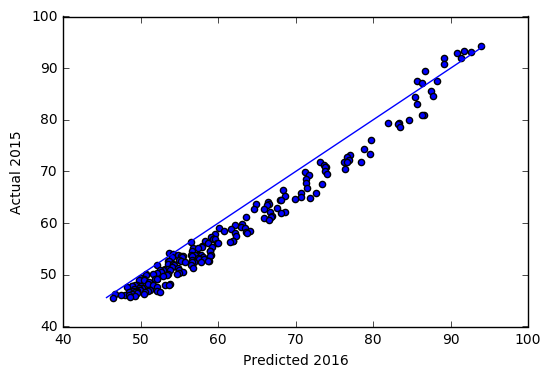

3.56910824965


In [343]:
#df2=df2[['world_rank','total_score']].sort_values('total_score',ascending=False)
r=[x for x in df2['total_score'].iloc[0:200]]
t=df1[df1['year']==2015]
z=t['total_score'].iloc[0:200]
a=[float(x) for x in z]
print type(a[0])
print type(r[0])
plt.scatter(r,a)
plt.plot(a,a)
plt.xlabel("Predicted 2016")
plt.ylabel("Actual 2015")
plt.show()
print np.sqrt(sum( [(x-y)**2 for x,y in zip(a,r)] )/len(a))

In [289]:
df2.head(20)
df2[['world_rank','total_score']].sort_values('total_score',ascending=False)
r=[x for x in df2['total_score'].iloc[0:200]]

In [334]:
dfyears=dfyears[dfyears['international']!='-']
dfyears=dfyears[pd.notnull(dfyears['num_students'])]
dfyears['international']=dfyears['international'].astype(np.float)
dfyears['num_students']=[lenx[-3:]dfyears['num_students'].asype(np.int)

TypeError: invalid type comparison

In [335]:
dfyears.dtypes

world_rank                  int64
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                     object
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object